# Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# the shape of the data
data.shape

(150, 5)

In [4]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# various category in target variable
np.unique(data['class'])
data['class'] = data['class'].astype(str)


Here is the extracted text from the image:

---

### Handling Categorical Data

Categorical data refers to variables that take on discrete values that represent categories, such as colors, shapes, or types of objects.

It can be **nominal** (no order or ranking among categories; e.g., gender=male/female, hair color=black/brown/green/blue/grey) or **ordinal** (categories have a natural order or ranking; e.g., customer feedback rating 0-10).

One may handle categorical data with one of the following techniques. However, this is not an exhaustive list.

1. **One-Hot Encoding:** This technique involves creating a new binary feature for each category in the original feature. Each binary feature represents whether the original feature has that category or not.

   * For example, if the original feature is "color" and the possible categories are "red", "green", and "blue", one-hot encoding would create three new binary features: "is\_red", "is\_green", and "is\_blue" to replace the "color" column in the dataset.

2. **Label Encoding:** This technique involves assigning a unique integer value to each category in the original feature.

   * For example, if the original feature is "color" and the possible categories are "red", "green", and "blue", label encoding would assign the values 0, 1, and 2 to the categories.

3. **Ordinal Encoding:** This technique is similar to label encoding, but it is used when the categories have a natural order or ranking.

   * For example, if the original feature is "size" and the possible categories are "small", "medium", and "large", ordinal encoding would assign the values 0, 1, and 2 to the categories, respectively.

---


In [6]:
# For our current problem , we will use the label encoding
# Label Encode the target variable

class_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['class'] = data['class'].map(class_dict)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
features = data.iloc[:, :-1]
predictions = data.iloc[:,-1] #last column the target variable

In [8]:
# Print a few rows of independent variables
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# print the few rows of depenedent variables
predictions.head()

,class
0,0
1,0
2,0
3,0
4,0


### Feature Scaling

In [10]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Used to perfom standrization of the features
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


*The data is split into feature and predictions. Now, It will be further divided into the training and testing data.*

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=50, shuffle=True)
# 20% of the total data is kept as test data

#### Perform EDA( Exploratory data analysis)

In [12]:
Train_data = pd.concat([X_train, y_train], axis='columns', names=[features.columns, 'class']) # join along the columns
Train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
125,1.643844,0.337848,1.274550,0.790591,2
98,-0.900681,-1.281972,-0.431421,-0.129720,1
73,0.310998,-0.587764,0.535296,0.001753,1
144,1.038005,0.569251,1.103953,1.710902,2
21,-0.900681,1.494863,-1.284407,-1.050031,0


#### Summary Statistics

In [13]:
# print summary statistics
Train_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.063613,0.008099,-0.028149,-0.023446,1.000000
std,1.000533,0.999773,1.000192,0.997969,0.830106
min,-1.870024,-2.438987,-1.568735,-1.444450,0.000000
25%,-0.900681,-0.587764,-1.284407,-1.181504,0.000000
50%,-0.113090,-0.124958,0.279400,0.133226,1.000000
75%,0.674501,0.627102,0.762759,0.790591,2.000000
max,2.249683,3.114684,1.672610,1.710902,2.000000


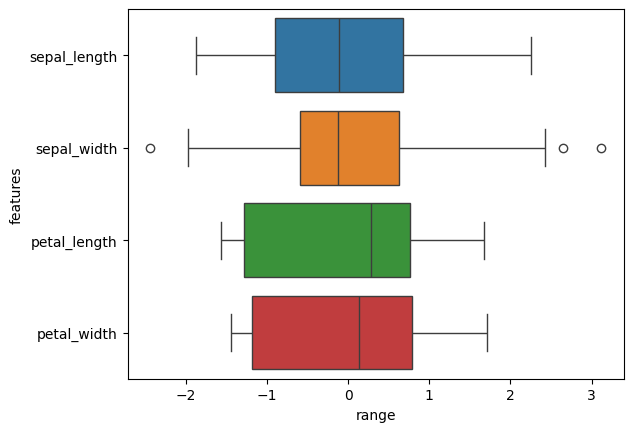

In [14]:
# Let us also visualize the features in a box plot to check for outliers
import seaborn as sns
sns.boxplot(data=X_train, orient ="h").set(xlabel='range', ylabel='features')
plt.show()

 *After Visualization we found that the Data Outliers in columns 'sepal_width'. Let us validate this further usin IQR Rule and EXtracting otuliers.*

In [15]:
# Define function to extract outliers using interquartile range (IQR) Method

def get_outliers_IQR(X):
  """
  Function ton extract outliers using interquartile range (IQR) method.
  Args:
     X(numpy array): The column to find the outliers in a dataframe.

     returns:
     outliers(list): A list of outlier(Values)
     outlier_indices(list): List of corresponding indices of the outliers
  """

  q1 = np.quantile(X, 0.25) # Finding the 1st Quartile
  q3 = np.quantile(X, 0.75) # Finding the 3rd quartile
  median  = np.median(X)

  # Find the IQR region
  iqr = q3-q1

  # Find Upper and Lower whiskers
  upper_bound = q3 + (1.5*iqr)
  lower_bound = q1 - (1.5*iqr)

  # Calculate outliers
  outliers = X[(X >= upper_bound) | (X <= lower_bound)]
  outlier_indices = np.where((X <= lower_bound) | (X >= upper_bound))

  return outliers, outlier_indices[0].tolist()

*In order to ensure that we have a copy of the train data before dropping the outliers, we work with a copy of the train dataframe. this helps us avoid the hastle of generatinf data again from the orginal data.*

In [16]:
# Generate a copy of the train dataframe & work with it.
Train_copy = Train_data.copy()
Train_copy.reset_index(drop=True, inplace=True)

# Calling the 'get_outlier' function
outliers, outlier_indices = get_outliers_IQR(Train_copy['sepal_width'].to_numpy())
# Print the outliers and the corresponding indices
print('The outliers in the feature "sepal_width" are: ', outliers)
print('These are available on indexes: ', outlier_indices)


The outliers in the feature "sepal_width" are:  [ 3.11468391 -2.43898725  2.65187798]
These are available on indexes:  [22, 89, 117]


##### Let us drop these samples

In [17]:
Train_copy.drop(outlier_indices, inplace=True)
Train_copy.reset_index(drop=True, inplace=True)
Train_copy

,sepal_length,sepal_width,petal_length,petal_width,class
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
112,1.038005,-0.124958,0.819624,1.447956,2
113,0.068662,0.337848,0.592162,0.790591,1
114,0.674501,-0.587764,1.047087,1.316483,2
115,1.643844,1.263460,1.331416,1.710902,2


##### The three rows correspondings to the outliers samples have been dropped

In [18]:
Train_data.shape  #Originally

(120, 5)

*Notice the change in the dimension of the new dataset*

In [19]:
#Update X_train and y_train
X_train = Train_copy.iloc[:, :-1]
y_train = Train_copy.iloc[:, -1]

In [20]:
y_train

,class
0,2
1,1
2,1
3,2
4,0
...,...
112,2
113,1
114,2
115,2


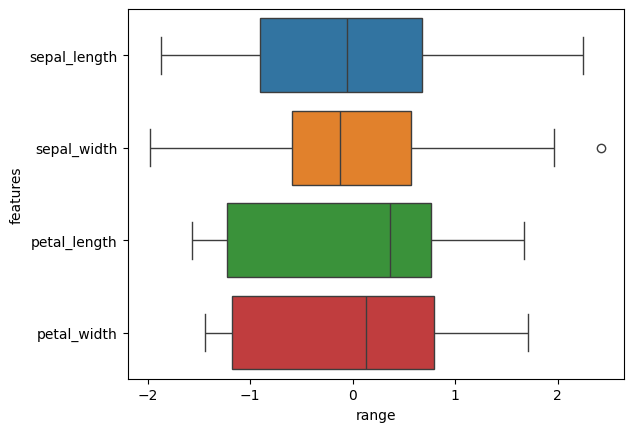

In [21]:
# Plot the box plot again and check if there are any more outliers
sns.boxplot(data=X_train, orient="h").set(xlabel='range', ylabel='features')
plt.show()

*The new data pf 'sepal-width', still contains An outlier based on IQR rule. Thus,  the ourlier dropping process has to be done again to ensure that the data is completely clean.*

In [22]:
# call the 'get_outlier function
outliers, outlier_indices = get_outliers_IQR(Train_copy['sepal_width'].to_numpy())
#Print the outliersnand the corresponding indices
print('The Outliers in the feature "sepal_width", are: ', outliers)
print('These are available on indexes: ', outlier_indices)

The Outliers in the feature "sepal_width", are:  [2.42047502]
These are available on indexes:  [46]


Let us try on another Feature to verify our inspection about the outliers

In [23]:
# call the 'get_outlier function
outliers, outlier_indices = get_outliers_IQR(Train_copy['sepal_length'].to_numpy())
#Print the outliersnand the corresponding indices
print('The Outliers in the feature "sepal_length", are: ', outliers)
print('These are available on indexes: ', outlier_indices)

The Outliers in the feature "sepal_length", are:  []
These are available on indexes:  []


*Visual inspection has been successfully validated*

Now drop the remaining outlier

In [24]:
# Drop Outlier
Train_copy.drop(outlier_indices, inplace=True)
Train_copy.reset_index(drop=True, inplace=True)
Train_copy

,sepal_length,sepal_width,petal_length,petal_width,class
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
112,1.038005,-0.124958,0.819624,1.447956,2
113,0.068662,0.337848,0.592162,0.790591,1
114,0.674501,-0.587764,1.047087,1.316483,2
115,1.643844,1.263460,1.331416,1.710902,2


In [25]:
#Update X_Train and y _train
X_train = Train_copy.iloc[:, :-1]
y_train = Train_copy.iloc[:, -1]

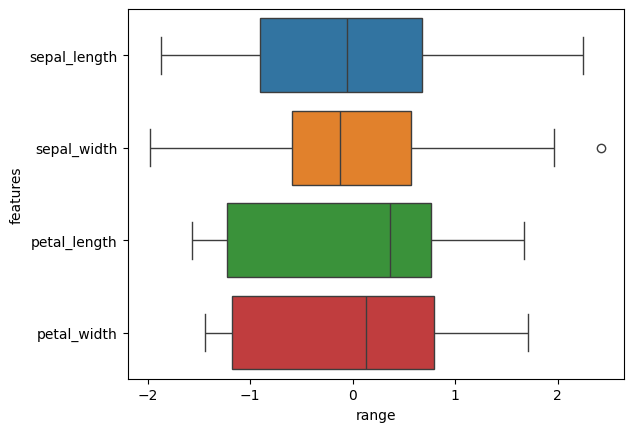

In [26]:
# Plot the Box Plot again
sns.boxplot(data=X_train, orient="h").set(xlabel='range', ylabel='features')
plt.show()

#### Class Distribution

In [27]:
classes, count = np.unique(y_train, return_counts=True)
count

array([39, 37, 41])

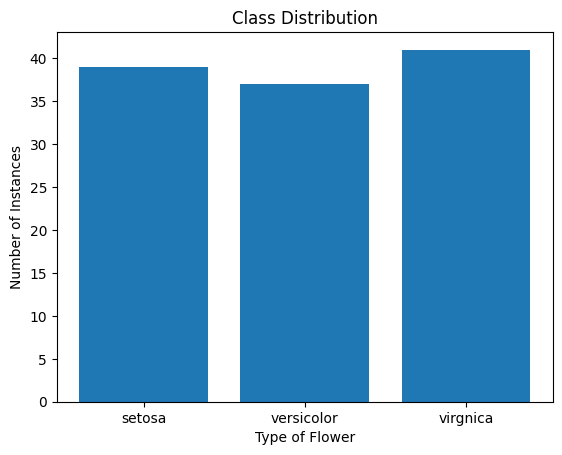

In [28]:
# Plot the Class Distribution
plt.bar(['setosa', 'versicolor', 'virgnica'],count)
plt.title('Class Distribution')
plt.xlabel("Type of Flower")
plt.ylabel("Number of Instances")
plt.show()

The Data is Slightly disbalanced

#### Correlation Analysis

In [29]:
# Perform correlation analysis between numerical features
corr_mat = Train_copy.corr(method='pearson') # Pearson correlation is used
corr_mat

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.139810,0.883199,0.825651,0.794366
sepal_width,-0.139810,1.000000,-0.412767,-0.350529,-0.427108
petal_length,0.883199,-0.412767,1.000000,0.959729,0.949600
petal_width,0.825651,-0.350529,0.959729,1.000000,0.955540
class,0.794366,-0.427108,0.949600,0.955540,1.000000


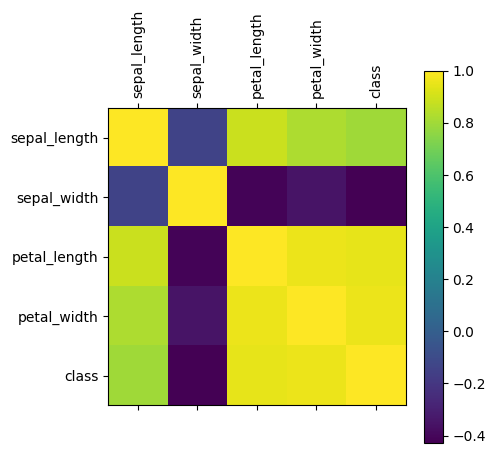

In [30]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

*The Features petal width and length show a strong correlation with the target variable.*

*The feature sepal width is not much
correlated with the target variable.*

*The feature sepal length is moderatley correlated with the target variable as compared to other features.*

#### Visualiztion

Plot the scatter plot between the dependent variable and the individual independent variable

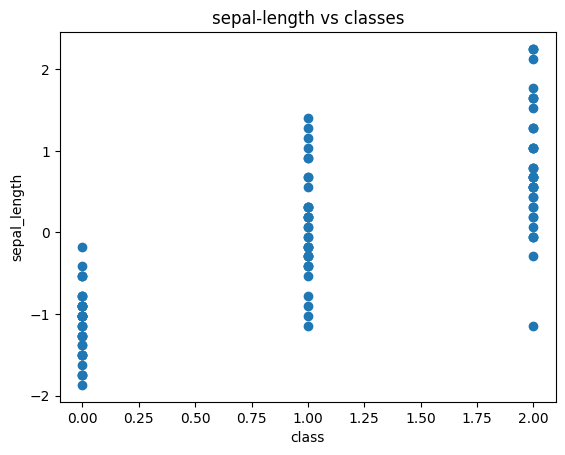

In [31]:
plt.scatter(y_train, X_train['sepal_length'])
plt.title('sepal-length vs classes')
plt.xlabel('class')
plt.ylabel('sepal_length')
plt.show()

*There is an overlap in the sepal length value across classes. So, sepal length is not strong distinguisher between classes.*

*Note: Do not get confused with the negative sepal length. Recall that we did feature scaling*

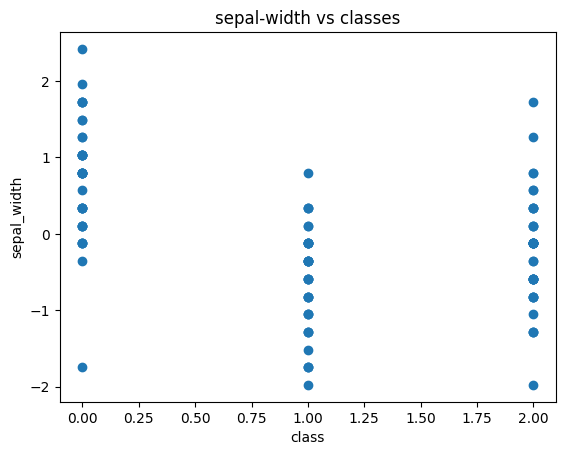

In [32]:
# Now visualize the Sepal Width
plt.scatter(y_train, X_train['sepal_width'])
plt.title('sepal-width vs classes')
plt.xlabel('class')
plt.ylabel('sepal_width')
plt.show()

*There is an overlap in the sepal width values across classes. So, Sepal width is also not a strong distinguisher between classes.*

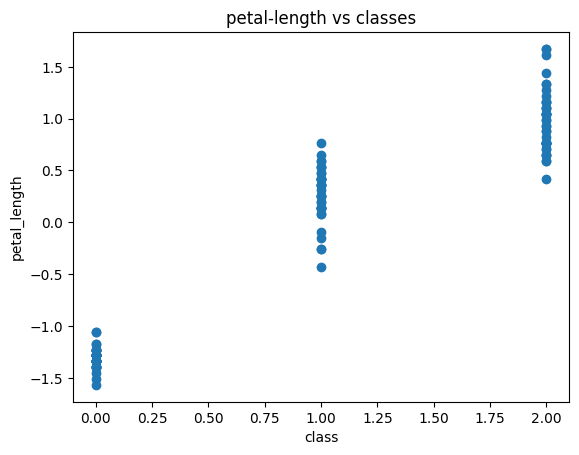

In [33]:
# Now let's visualizr the petal length
plt.scatter(y_train, X_train['petal_length'])
plt.title('petal-length vs classes')
plt.xlabel('class')
plt.ylabel('petal_length')
plt.show()



*   *We can see that the petal length of the 0th species (setosa) is concentrated between -1 and -1.5. This can be helpful in distinguishing 0th species from the other two.*

* *However, the 1st and the 2nd species have overlapping petal_length and therefore, these are indistinguishable using the petal_length feature alone.*



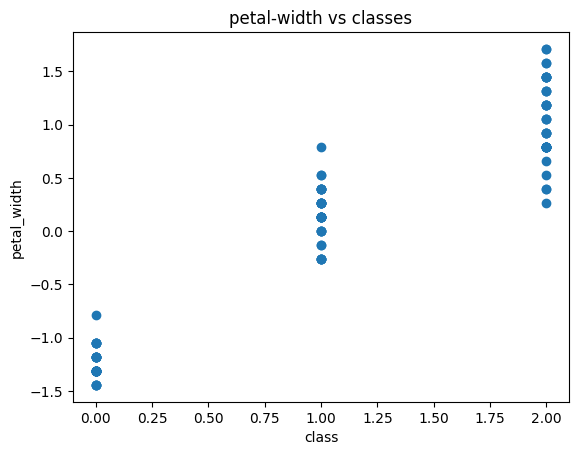

In [34]:
# Now let's visualizr the petal width
plt.scatter(y_train, X_train['petal_width'])
plt.title('petal-width vs classes')
plt.xlabel('class')
plt.ylabel('petal_width')
plt.show()

*Similar to our observations for petal\_width, 0th species is quite distinguishable using petal\_width as well.*

*The above observations from the visualization also mandate us to build an ML-model because merely using individual features we cannot simply distinguish the flower species.*


#### Model Building : Training and Testing

In [35]:
# Import logistic regression class
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0) #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set

*Importance of random state* -
*one must seed the random state variable wherever applicable. This ensure the reproductibility of the training process. otherwise the computer will intrinsically select a random seed every time the function is run.*

#### Results and Interpretation

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation Metrics: Train data
Train accuracy:  0.974
Train confusion matrix: 
 [[39  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy : 0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


* *The model quite accurately learns class0. No errors for either train or test predictions. This result is intutive,  as we had seen in the visualizations that both petal_width and petal_length features easily distinguished class 0 from other two classes.*

* *Sample of class1 is being misclassified as class 2 and vice-versa. by the method in both train and test data. one may work over these examples and improve the model*



---

### • Playing with the Parameters of the model

We have used the Logistic Regression model from sklearn ([https://scikit-learn.org/stable/modules/generated/sklearn.linear\_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). So far, we used the model with default parameters. Let us discuss details about some of the parameters:

* **penalty** {'l1', 'l2', 'elasticnet', None}, default='l2': This is the regularization type.
* **C** float, default=1.0: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
* **fit\_intercept** bool, default=True: Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
* **class\_weight** dict or 'balanced', default=None: Used to specify the weights associated with each class. Its value can be of three types
  ○ None: All classes have weight=1, regardless of the number of samples of each class.
  ○ dict: Customised dictionary in the form {class\_label: weight} containing weights associated with classes.
  ○ 'balanced': To give all classes equal weight by giving each sample a weight inversely related to its class's prevalence (proportion of the population) in the training data. This way each class will have equal weight even when the number of samples are different.
* **solver** {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs': Algorithm to use in the optimization problem.
  ○ lbfgs: Utilizes Quasi-Newton methods ([https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno\_algorithm](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm))

○ liblinear: Uses Coordinate descent (CD) algorithm [https://en.wikipedia.org/wiki/Coordinate_descent]

○ newton-cg: Implementation of Newton’s optimization and conjugate gradient (CG) algorithm using quadratic approximation

○ newton-cholesky: Exact implementation of Newton optimization method

○ sag: Implementation of Stochastic Average Gradient descent [Mark Schmidt, Nicolas Le Roux, and Francis Bach: Minimizing Finite Sums with the Stochastic Average Gradient.]

○ saga: Variant of ‘sag’ [Aaron Defazio, Francis Bach, Simon Lacoste-Julien: SAGA: A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives.]

Below table describes the utility for each solver (https://scikit-learn.org/stable/modules/linear_model.html).

The following table summarizes the penalties supported by each solver



---

### **Table: Penalties and Behaviors Supported by Each Solver**

| **Penalties / Behaviors**        | **'lbfgs'** | **'liblinear'** | **'newton-cg'** | **'newton-cholesky'** | **'sag'** | **'saga'** |
| -------------------------------- | ----------- | --------------- | --------------- | --------------------- | --------- | ---------- |
| **Multinomial + L2 penalty**     | yes         | no              | yes             | no                    | yes       | yes        |
| **OVR + L2 penalty**             | yes         | yes             | yes             | yes                   | yes       | yes        |
| **Multinomial + L1 penalty**     | no          | no              | no              | no                    | no        | yes        |
| **OVR + L1 penalty**             | no          | yes             | no              | no                    | no        | yes        |
| **Elastic-Net**                  | no          | no              | no              | no                    | no        | yes        |
| **No penalty (‘none’)**          | yes         | yes             | yes             | yes                   | yes       | yes        |
| **Penalize the intercept (bad)** | no          | yes             | no              | no                    | no        | no         |
| **Faster for large datasets**    | no          | no              | no              | no                    | yes       | yes        |
| **Robust to unscaled datasets**  | yes         | yes             | yes             | yes                   | no        | no         |

---

### **Additional Notes**

* **OVR**: One-Versus Rest
* **random\_state** `int`, `RandomState` instance, default=`None`: Used as the seed to random variables in optimizers.
* **max\_iter** `int`, default=`100`: Maximum number of iterations taken for the solvers to converge.
* **l1\_ratio** `float`, default=`None`: Only used if `penalty='elasticnet'`. It is the weightage for L1 against L2. It must be between 0 and 1.

---



---

**Note:** There are other parameters settings, only relevant ones have been listed here.

*Let us check the variations in our model performance by altering the parameters. Let us start with changing the solver.*

*We select **‘saga’** for the below reasons:*

* It is acceptable for all the regularization techniques (None, ‘l1’, ‘l2’, or ‘elastic-net’). So, we can experiment with other parameters with more independence.
* Ours is a multinomial (multi-class) data. Here, it is a three-class classification.
* It is fast.
* The only downside is that it is not robust to unscaled datasets. However, our data is scaled already.

---



In [40]:
# Solver-'saga', Random state = 0, penanlty = none
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', random_state=0, penalty= None) #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set


#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train Accuracy:", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)


Evaluation Metrics: Train data
Train Accuracy: 0.983
Train confusion matrix: 
 [[39  0  0]
 [ 0 36  1]
 [ 0  1 40]]
Test accuracy : 0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*Observations:*

* *The divide between train and test accuracy has widened. it is clear case of overfitting. Perhaps, this is where regularization is required.*

* *The warning of reaching 'max_iter' indicates that 100(default) iterations were not sufficient for this model.*

Let us try to increase the number of iterations and see if the results improve

In [41]:
# Solver-'saga', Random state = 0, penanlty = none
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', random_state=0, penalty= None, max_iter=1100) #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set


#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train Accuracy:", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)


Evaluation Metrics: Train data
Train Accuracy: 0.983
Train confusion matrix: 
 [[39  0  0]
 [ 0 36  1]
 [ 0  1 40]]
Test accuracy : 0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


*We can see that the there is no longer a warning. However, the results remain unimpacted*

Let us try L1 Regularization

In [44]:
# Solver-'saga', Random state = 0, penanlty = none
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', random_state=0, penalty= 'l1', max_iter=900) #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set


#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train Accuracy:", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)


Evaluation Metrics: Train data
Train Accuracy: 0.974
Train confusion matrix: 
 [[39  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy : 0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


*The Warning stopped in lesar number of iterations than in the case of no Regularizatio. this means that our model converged faster this time.*

Let us try L2 Regularization Now,

In [45]:
# Solver='saga', Random state =0, penalty=l2
# Solver-'saga', Random state = 0, penanlty = none
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', random_state=0, penalty= 'l2') #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set


#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train Accuracy:", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)


Evaluation Metrics: Train data
Train Accuracy: 0.974
Train confusion matrix: 
 [[39  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy : 0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


*We have seen this result before, this is the same result as that of the default parameters("lbfgs" solver and "l2" Regularization).*

Can a balanceed class Weightage improve the results? Let us check


In [46]:
# Solver-'saga', Random state = 0, penanlty = l2, class_weight = 'balanced'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', random_state=0, penalty='l2', class_weight='balanced') #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set


#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train Accuracy:", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)


Evaluation Metrics: Train data
Train Accuracy: 0.974
Train confusion matrix: 
 [[39  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy : 0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


*No change in the results. Balancing the wights,  even when there was a slight class Imbalanced, did not alter the results for our case.*
*Possibly , this strategy might be helpful in the case of larger class imbalance*.


Let us check for Elastic net regularization.

We will check for multiple l1_ratio. changing the l1_ratio values in different parameters.., ex- l1_ratio=0.9, l1_ratio=1 , ... etc

In [47]:
# Solver-'saga', Random state = 0, penanlty = 'elasticnet', l1_ratio=0.5
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', random_state=0, penalty= 'elasticnet', l1_ratio=0.5) #Define an object of Logistic regression

model.fit(X_train, y_train) #Training the Model on train data
y_pred_train = model.predict(X_train) #make prediction on the training set
y_pred = model.predict(X_test) # Make prediction on the testing set


#Print the evaluation metrics on the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation Metrics: Train data")
print("Train Accuracy:", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy :", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)


Evaluation Metrics: Train data
Train Accuracy: 0.974
Train confusion matrix: 
 [[39  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy : 0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


### Conclusion

A three class logistic regression to predict the classes of the iris flower based on the available four features has been trained with a accuracy of 0.933..